In [1]:
from typing import Dict, List

import numpy as np
import sympy
from sympy import S, symbols, Function, dsolve, solveset, linsolve, integrate, diff, plot
from sympy import Equality, Basic
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt

In [2]:
from typing import overload, Callable, Optional, Tuple, Any

from sympy import latex
from sympy.core._print_helpers import Printable
from IPython.display import Latex

# Should be set to 'False' if Google Colab is used.
VS_CODE: bool = True

@overload
def display_with_text(text: Optional[str] = None, *, sep: str = r"\\") -> None:
    ...

@overload
def display_with_text(text: Optional[str] = None, expression: Optional[Any] = None, *, sep: str = r"\\") -> None:
    ...

@overload
def display_with_text(text: Optional[str] = None, *expressions: Any, sep: str = r"\\") -> None:
    ...

def display_with_text(*args, **kwargs) -> None:
    text: Optional[str] = kwargs.get("text", None)
    expression: Optional[Any] = kwargs.get("expression", None)
    
    sep: str = kwargs.get("sep", r"\\")
    if not isinstance(sep, str):
        raise ValueError(f"Keyword argument 'sep' must be type of <class 'str'> (class str)")

    if text is None and args and args[0] is not None:
        text = str(args[0])
    
    if text is not None and not isinstance(text, str):
        text = str(text)
    
    expressions: Tuple[Any] = args[1:]
    if expression is not None:
        expressions += (expression,)

    if not expressions:
        if text is not None:
            text = "$ \\text{" + text + "} $" if VS_CODE else "\\text{" + text + '}'
            display(Latex(text))
        return
    
    expr_processor: Callable[[Any], str] = \
        lambda expr: str(latex(expr) if isinstance(expr, Printable) else expr)
    final_expression: str = sep.join(map(expr_processor, expressions))
    
    if VS_CODE:
        final_expression = "$ " + final_expression + " $"

    if text is not None:
        final_expression = \
            ("$ \\text{" + text + "} $ " if VS_CODE else "\\text{" + text + "} ") \
            + final_expression

    display(Latex(final_expression))


## Занятие 18
## Математический анализ
## Линейные ОДУ второго порядка с постоянными коэффициентами
### Задача 1
Решить ОДУ $3y''+5y'-2y=0$ по формуле из файла с примерами и с помощью dsolve.

In [3]:
def solve_ode(a, b, c, lib: str = "sympy") -> Callable[[Any, Any, Any], Any]:
    if lib not in {"numpy", "sympy"}:
        raise ValueError("lib must be either sympy or numpy")

    lib_is_sympy: bool = lib[0] == 's'

    k = sympy.Symbol('k')
    roots = tuple(solveset(a*k**2 + b*k + c))
    root1 = roots[0]
    if len(roots) == 1:
        if lib_is_sympy:
            ekx = Exp(root1*x)
        else:
            ekx = np.exp(np.float64(root1)*x)
        return lambda x, C1, C2: (C1 + C2*x)*ekx
    
    root2 = roots[1]
    
    if root1.is_real:
        if lib_is_sympy:
            return lambda x, C1, C2: C1*Exp(root1*x) + C2*Exp(root2*x)
        
        root1 = np.float64(root1)
        root1 = np.float64(root2)
        return lambda x, C1, C2: C1*np.exp(root1*x) + C2*np.exp(root2*x)
    
    alpha = sympy.re(root1)
    beta = sympy.im(root1)

    if lib_is_sympy:
        return lambda x, C1, C2: Exp(alpha*x)*(C1*Cos(beta*x) + C2*Sin(beta*x))
    
    alpha = np.float64(alpha)
    beta = np.float64(beta)
    return lambda x, C1, C2: np.exp(alpha*x)*(C1*np.cos(beta*x) + C2*np.sin(beta*x))

x, y, z, C1, C2 = symbols("x y z C1:3")
a, b, c = 3, 5, -2

f_x = solve_ode(a, b, c)
display_with_text("Решение ОДУ:", f_x(x, C1, C2))

y_abs = Function('y')(x)
ODE = a*diff(y_abs, x, 2) + b*diff(y_abs, x) + c*y_abs
y_x = dsolve(ODE, y_abs)
display_with_text("Решение ОДУ c dsolve:", y_x)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задача 2.
Решить задачу Коши:
$$
\left\{
\begin{matrix}
9y''+3y'+y=0\\
y(0)=0\\
y'(0)=2\sqrt3
\end{matrix}
\right.
$$
##### Указание.
Решить с помощью dsolve, затем составить словарь символов решения, ключи - 'x', 'C1', 'C2', а значения - соответствующие элементы из множества  ХХХ.rhs.free_symbols, решить систему линейных относительно С1 и С2 уравнений, описывающих начальные условия.

In [4]:
x, y, z, C1, C2 = symbols("x y z C1:3")
a, b, c = 9, 3, 1
y_abstract = Function('y')(x)

ODE = a*diff(y_abstract, x, 2) + b*diff(y_abstract, x) + c*y_abstract
y_x: Equality = dsolve(ODE, y_abstract)
display_with_text("Решение ОДУ:", y_x)

symbs_dict: Dict[str, Basic] = {str(symb): symb for symb in y_x.rhs.free_symbols}
equations = (
    sympy.Eq(y_x.rhs.subs({x: 0}), 0),
    sympy.Eq(y_x.rhs.diff(x).subs({x: 0}), 2*sympy.sqrt(3))
)
roots = linsolve(equations, symbs_dict['C1'], symbs_dict['C2']).args[0]
y_x = y_x.subs({symbs_dict[Cname]: root for Cname, root in zip(('C1', 'C2'), roots)})
display_with_text("Решение системы:", y_x)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Индивидуальное задание
Решить с помощью dsolve:
$$
y''' + y'' + y' + y = (4x + 6)e^{2x}.
$$
Построить график $y(x)$ при начальных условиях $y(0) = 4$, $y'(0) = 2$, $y''(0) = 0$.

### Вариант 50
$$
y''' + y'' + y' + y = (6x^2+ 5x)e^x, y(0) = 2, y′(0) = 1, y′′(0) = −2 
$$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

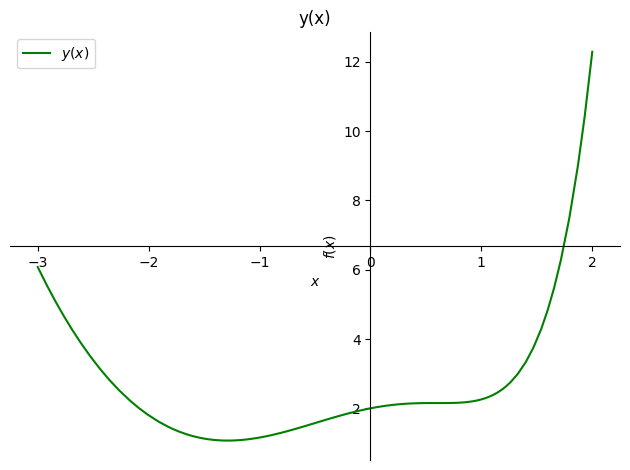

In [6]:
x, y, z, C1, C2 = symbols("x y z C1:3")
y_abstract = Function('y')(x)

ODE = sum(y_abstract.diff(x, i) for i in range(4)) - (6*x**2 + 5*x)*Exp(x)
y_x: Equality = dsolve(ODE, y_abstract)
display_with_text("Решение ОДУ:", y_x)

symbs_dict: Dict[str, Basic] = {str(symb): symb for symb in y_x.rhs.free_symbols}
C_vars: Dict[str, Basic] = {C_name: C for C_name, C in symbs_dict.items() if 'C' in C_name}
equations: List[Equality] = [sympy.Eq(y_x.rhs.diff(x, i).subs({x: 0}), k) for i, k in ((0, 2), (1, 1), (2, -2))]

roots = linsolve(equations, *C_vars.values()).args[0]
display_with_text("Решение системы:", roots)
y_x = y_x.subs({C_vars[Cname]: root for Cname, root in zip(('C1', 'C2', 'C3'), roots)}).simplify()

p_tan = plot(
    y_x.rhs, 
    (x, -3, 2),
    title="y(x)",
    label="$y(x)$", 
    legend=True, 
    line_color='g',
)